<a href="https://colab.research.google.com/github/panicoro/CatanSettlers/blob/master/0_1_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de Datos e Inteligencia Artificial para la industria del software**

## **Edición 2024**

---
## 1.1.1. Análisis Exploratorio de Datos

* Bibliotecas: Pandas

---
# ***Pandas***
---


### Objetivos de la clase

* Repasar los conceptos de Pandas.
* Conexión con Google Drive.
* Exploración de Datos.
* Conocer y aplicar Apply.
* Agrupar y Ordenar datos.
* Manipulación de Fechas.


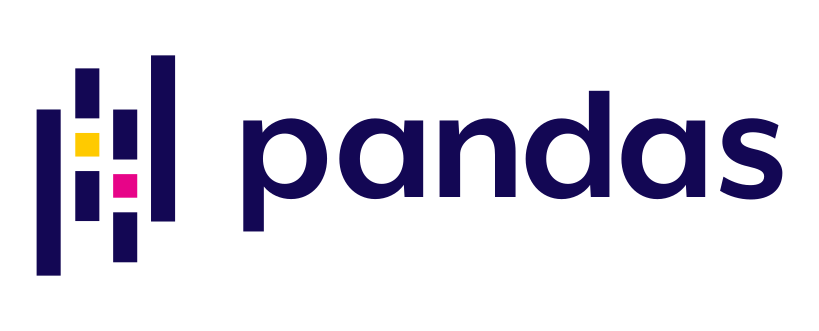

**Pandas** es una librería de Python especializada en la manipulación y el análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales, es como el Excel de Python.

**Principales características**

- **Colección de estructuras de datos y funciones** que facilitan el trabajo con datos estructurados.

- Nombre derivado de  "**Pan**el **Da**ta **S**ystem" (término econométrico para datasets multidimensionales).

- Construído **en base a Numpy**, inicialmente por Wes McKinney.

- Ofrece más versatilidad que Numpy: podemos trabajar con **datos de diferentes tipos** y podemos identificar las filas y columnas **usando etiquetas**, en lugar de solamente enteros.
    
- Combina la alta performance de las **operaciones sobre arrays de NumPy con la flexibilidad en la manipulación de datos** de un spreadsheet o una base de datos relacional.

- Provee **funcionalidades de indexación avanzadas** para facilitar la manipulación, agregación y selección de partes de un dataset.

- Provee **operaciones de agrupación por columnas, filtros y sumarizaciones**.

- Estas características hacen de pandas una librería **indispensable para las tareas de limpieza y preprocesamiento de datos**.


# Estructuras de datos de Pandas

---

Veremos los siguientes objetos:

* Series

* DataFrames




In [ ]:
import pandas as pd

In [ ]:
?pd.DataFrame

In [ ]:
help(pd.Series)

## Series
---

- Una Series es un objeto similar a un **vector unidimensional**
- Contiene un array de valores y un array asociado de etiquetas de estos valores denominado como **índice**.
- Una Serie también puede ser pensada como un diccionario de tamaño fijo con sus **claves ordenadas**.
- Al igual que los arrays de NumPy, permite pasar una lista de valores con índices para seleccionar un subconjunto de valores.

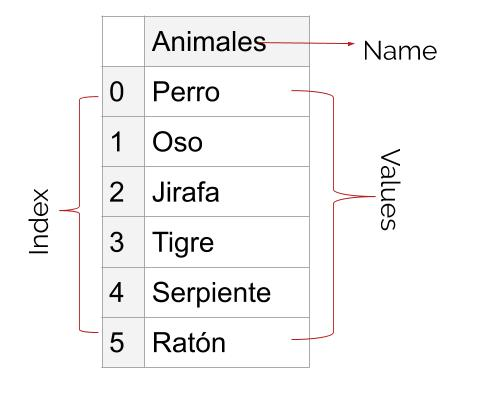


### En Python
---


In [ ]:
lista = [0.25, 0.5, 0.75, 1.0]
data = pd.Series(lista)

In [ ]:
print("Lista")
print(lista)

print("Serie")
print(data)

In [ ]:
data.values

In [ ]:
data.index

**Ejercicio:** Crea tu primera Serie con los valores [0,1,2,3,4,5,6,7,8,9] llamada enteros

**Haz doble click para ver la respuesta**

<!--
enteros = pd.Series([0,1,2,3,4,5,6,7,8,9])
print(enteros)
 -->

## DataFrame
---
- Representa una estructura de datos tabular que contiene una **colección de columnas**, cada una de las cuales tiene un **tipo determinado** (number, string, boolean).
- El DataFrame tiene índices de columnas y filas.
- En el día a día de un data scientist la limpieza, preparado y normalización de los datos con los que trabaja es la tarea que más tiempo insume.

- Pandas es la librería principal al momento de tener que realizar estas tareas.

- Los DataFrame de Pandas son la herramienta fundamental que vamos a utilizar a lo largo del curso y de nuestro día de trabajo a partir de ahora.


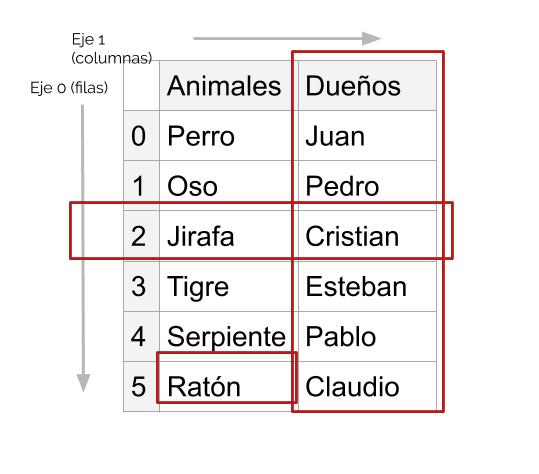

### En Python
---
Vamos a construir dos instancias de Series:

- `area`, a partir de un diccionario

- `population`, a partir de dos listas

Luego construimos el DataFrame states a partir de las dos Series resultado del paso anterior

In [ ]:
import numpy as np

In [ ]:
area_dict = {'Buenos Aires': 423967, 'Cordoba': 695662, 'La Rioja': 141297,
             'Tucuman': 170312, 'San Juan': 149995}
area = pd.Series(area_dict)

In [ ]:
print(area)

In [ ]:
states_list = ['La Rioja','Buenos Aires','Cordoba', 'Tucuman', 'San Juan']
states_pop = [12882135, 26448193, 19651127, 19552860, 38332521]
population = pd.Series(states_pop, index= states_list)

In [ ]:
print(population)

In [ ]:
print(population.index)
print(area.index)

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})

In [ ]:
states

In [ ]:
states.shape

In [ ]:
states.index

In [ ]:
states.columns

In [ ]:
states.values

Podemos seleccionar la columna '`area`' del DataFrame

In [ ]:
states['area']

In [ ]:
states.area

Podemos indexar un DataFrame usando las posiciones (iloc) o los valores (loc)

In [ ]:
states.iloc[:3, :1]

In [ ]:
states.iloc[1:2, :3]

In [ ]:
states.loc[:'San Juan', :'population']

* La principal diferencia que existe entre loc e iloc es que en loc se usan las etiquetas (los nombres asignados tanto a las filas como a las columnas) mientras que en iloc se usan los índices de los elementos (la posición en la fila o la columna, comenzado a contar en 0).

Podemos indexar un DataFrame usando loc y máscaras booleanas

In [ ]:
states.loc[states.area > 423000, ['population', 'area']]

In [ ]:
states.loc[states.area > 423000, ['population']]

Podemos modificar valores de una DataFrame

In [ ]:
states['density'] = states['population'] / states['area']
states

In [ ]:
states.density

# Google Drive
---
Con ayuda del siguiente código podrás vincular tu cuenta de Google Drive.

Como recomendación te pedimos que crees una carpeta denominada como `CCDAA` dentro de tu carpeta principal de Drive.

Dentro de esa carpeta crea otra carpeta denominada `Data` en esa carpeta deberás subir siempre los archivos que necesites utilizar.

Con el siguiente comando podrás abrir el archivo que vamos a necesitar en ésta ocasión:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/CCDAA/Data/'

# Exploración del dataset

En esta clase, vamos a trabajar con un dataset de review de vinos: `winemag-data-130k-v2.csv`.


* El dataset deberá estar dentro de la carpeta `Data`
* Lo podemos descargar en: https://www.kaggle.com/zynicide/wine-reviews/ (nos tenemos que registrar)

## Antes que nada, hablemos de Tipos de Variables

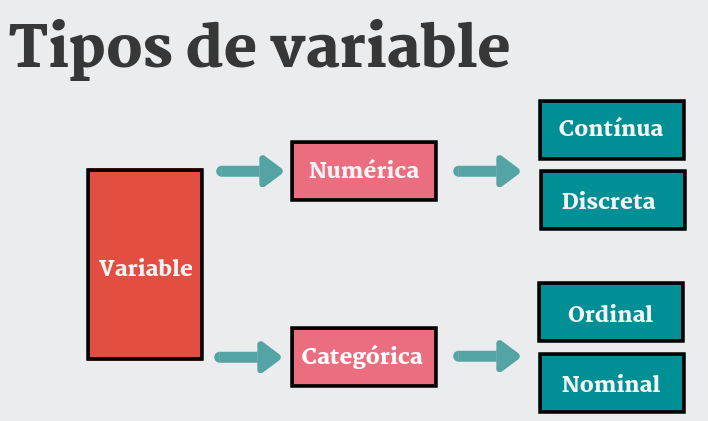

In [ ]:
ruta_archivo = pathCurso + 'winemag-data-130k-v2.csv'

In [ ]:
print(ruta_archivo)

In [ ]:
wine_reviews_df = pd.read_csv(ruta_archivo)
wine_reviews_df.head()

Vemos que la columna `Unnamed: 0`, es una columna con valores secuenciales, que por el momento podríamos quitar:

In [ ]:
del wine_reviews_df['Unnamed: 0']

In [ ]:
wine_reviews_df.head(2)

**Opción 2 de apertura**

In [ ]:
wine_reviews_df = pd.read_csv(ruta_archivo, index_col='Unnamed: 0')
wine_reviews_df.head()

**Opción 3 de apertura**

In [ ]:
wine_reviews_df = pd.read_csv(ruta_archivo, index_col=0)
wine_reviews_df.head()

In [ ]:
# Funcion analisis descriptivo basico base de datos:
def descriptivo(datos):
    print("Head")
    display(datos.head())
    print("-----------------------------------------------------------------")
    print("")

    print("Nombre columnas")
    display(datos.columns)
    print("-----------------------------------------------------------------")
    print("")

    print("Shape")
    display(datos.shape)
    print("-----------------------------------------------------------------")
    print("")

    print("Information")
    display(datos.info())
    print("-----------------------------------------------------------------")
    print("")

    print("Describe")
    display(datos.describe())
    print("-----------------------------------------------------------------")
    print("")

    print("Datos ausentes")
    display(datos.isna().sum())
    print("-----------------------------------------------------------------")
    print("")


Exploremos un poco el dataset.

In [ ]:
descriptivo(wine_reviews_df)

Imprimimos las primeras 5 filas:

In [ ]:
wine_reviews_df.head(5)

In [ ]:
display(wine_reviews_df.head(5))

Busco cual es el que tiene el valor maximo en puntos.

In [ ]:
# dir(wine_reviews_df)

In [ ]:
max_point = wine_reviews_df["points"].max()
print(max_point)
print(wine_reviews_df["points"].idxmax())

In [ ]:
# display(wine_reviews_df.iloc[345])
display(wine_reviews_df.iloc[wine_reviews_df["points"].idxmax()])

In [ ]:
# Podemos mesclar ambas formas de filtrar los datos en .loc
display(wine_reviews_df.loc[wine_reviews_df["points"].idxmax(),"description"])

Busco cual es el que tiene el valor mínimo en puntos.

In [ ]:
display(wine_reviews_df.iloc[wine_reviews_df["points"].idxmin()])

**¿Cuántos máximos hay?**

Esperemos un poquito y ya vemos la forma de responder esta pregunta...

**¿ Cuántas filas tiene el dataset? ¿ Y cuántas columnas ?**

Esta pregunta, podemos responderla utilizando `shape`



In [ ]:
wine_reviews_df.shape

¿ Cuántos valores faltantes tiene el dataset en cada columna ?

In [ ]:
display(wine_reviews_df.isna().sum())

In [ ]:
# wine_reviews_df.shape[0]

In [ ]:
# En porcentaje de la cantidad de datos
display((wine_reviews_df.isna().sum()/wine_reviews_df.shape[0])*100)

Ahora, ¿Qué hacemos con los faltantes?

Pandas tiene el método .fillna() para imputar valores faltantes y el método .dropna() para eliminar filas con valores faltantes.

Veamos un poco de documentación:

In [ ]:
help(pd.DataFrame.dropna)

In [ ]:
help(pd.DataFrame.fillna)

Ahora, para no modificar nuestro dataset original, lo vamos a clonar con `copy()`

In [ ]:
# Clono ahora si modifico df no se modifica el original
df = wine_reviews_df.copy(deep=True)

Ahora vamos a trabajar sobre df.

In [ ]:
df.isna().sum()

In [ ]:
df.info()

Vemos que las columnas que tienen datos faltantes son designation, price, region_1, region_2, entre otras.

Por ahora, como solo estamos aprendiendo Pandas, no vamos a explorar mucho los datos para tomar decisiones. Simplemente vamos a aprender como se usa pandas. En próximas clases vamos a empezar a explorar los datos con mas detalle para tomar buenas decisiones.

Empecemos con el método fillna:

Vamos a imputar los valores faltantes de la columna "price" con la media de la columna.

In [ ]:
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price)
print(mean_price)

Verificamos que no haya más nulos

In [ ]:
df.isna().sum()

Vemos que ahora hay 0 null values en la columna price

Ahora, completemos las columnas "designation", "region_1" y "region_2" con el valor por defecto: "dato faltante".

Podemos hacerlo pasandole un diccionario como parametro:

In [ ]:
default_value = "dato faltante"
df = df.fillna(value={'designation': default_value, "region_1": default_value, "region_2": default_value})

Rellenamos con dato faltante la variable designation, region 1 y region 2

In [ ]:
df.isna().sum()

Ahora nos queda la columna country y las demás. En este caso, lo que vamos a hacer es descartar las filas que tengan valores faltantes en esta columna.
Para esto, vamos a usar el método dropna() y vamos a pasarle el parámetro axis=0

Veamos cuantas filas tiene el dataset antes de borrar nulos:

In [ ]:
df.shape[0]

Borramos nulos:

In [ ]:
df = df.dropna(axis=0)

Y ahora debería haber varias filas menos:

In [ ]:
wine_reviews_df.shape[0]

In [ ]:
df.shape[0]

In [ ]:
wine_reviews_df.shape[0]-df.shape[0]

## Filtro por máscara

Vimos que en numpy podemos utilizar filtros. En pandas también podemos hacerlo y es algo que vamos utilizar mucho asique es importante aprender a usarlo bien!

Los filtros se utilizan igual que en numpy.

Seleccionemos todas las filas en las que country sea = 'US'

In [ ]:
# df['country'] == 'US'

In [ ]:
mask_country = df['country'] == 'US'
print(mask_country)

In [ ]:
print(df[mask_country].shape)
df[mask_country].head(5)

## Funciones de Dataframes

- value_counts
- unique
- nunique
- max
- min
- sort_values

Responder las siguientes preguntas utilizando lo que sabemos de pandas + lo que investigamos de las funciones de arriba (con la menor cantidad de funciones posibles):

a) ¿ Qúe valores distintos (únicos) hay en la columna country ?

b) ¿ Cuántos valores distintos hay en la columna country ?

c) ¿ Con qué frecuencia (cuantas veces) aparece cada uno de los paises ?

d) ¿ Cuál es el valor máximo de la columna price ?

e) ¿ Cuál es el valor mínimo de la columna price ?

f) ¿ Cuál es el vino más caro ?

g) ¿ Cuántos vinos tienen un precio por encima de la media ?

h) ¿Cuántos vinos hay con el máximo de puntos?

a) ¿ Qúe valores distintos (únicos) hay en la columna country ?

In [ ]:
print(df['country'].unique())

b) ¿ Cuántos valores distintos hay en la columna country ?

In [ ]:
print(len(df['country'].unique()))
print(df['country'].nunique())

c) ¿ Con qué frecuencia (cuántas veces) aparece cada uno de los paises ?

In [ ]:
print(df['country'].value_counts())

In [ ]:
print(df['country'].value_counts("%")*100)

d) ¿ Cuál es el valor máximo de la columna price ?

In [ ]:
df["price"].max()

e) ¿ Cuál es el valor mínimo de la columna price ?

In [ ]:
df["price"].min()

f) ¿ Cuál es el vino más caro ?

In [ ]:
# Cuantos maximos hay
# caro = df[df["price"]==df["price"].max()]
# display(caro)
# o
df[df["price"]==df["price"].max()]

g) ¿ Cuántos vinos tienen un precio por encima de la media ?

In [ ]:
# df["price"]>mean_price

In [ ]:
mask_avg_price = df["price"]>mean_price
mayormedia = df[mask_avg_price]
print(len(mayormedia))
print(mayormedia.shape[0])
display(mayormedia.head())

h) ¿Cuántos vinos hay con el máximo de puntos?

In [ ]:
wine_reviews_df['points'] == max_point

In [ ]:
maximos = wine_reviews_df[wine_reviews_df['points'] == max_point]
print(len(maximos))
maximos[["country","designation","price", 'points']]

**Ejercicio**: ¿cuáles son los vinos más baratos?

In [ ]:
# Codigo
print(df[df["price"]==df["price"].min()].shape[0])
df[df["price"]==df["price"].min()]

**Haz doble click para ver la respuesta**

<!--
df[df["price"]==df["price"].min()]
 -->

# Apply

El método apply de los dataframes de pandas, nos permite realizar una acción sobre cada fila o columna (sobre un "axis") del dataset.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

Por ejemplo, queremos crear una nueva columna que se llame "description_len" y contenga la cantidad de caracteres que hay en cada fila de la columna "description".


In [ ]:
# help(pd.DataFrame.apply)

**Actividad**

Creemos una columna, que tenga la cantidad de caracteres que tiene la columna description.

In [ ]:
df['description_length'] = df['description'].str.len()
df

Hagamos un enfoque distinto


Primero: Definamos una función que cuente los caracteres de un string:

In [ ]:
def count_string_len(string:str) -> int:
    """
      La función tiene que retornar un número entero con la cantidad de caracteres del string.
      """
    return len(string)

In [ ]:
?count_string_len

In [ ]:
df['description_len'] = df['description'].apply(count_string_len)

In [ ]:
df.head(2)

In [ ]:
df.loc[1]

In [ ]:
df.loc[1,'description']

In [ ]:
print(count_string_len(df.loc[1,'description']))

In [ ]:
df.head(2)

Para utilizar apply, no hace falta definir una función aparte. También podemos hacerlo directamente utilizando funciónes "lambda":

[lambda](https://www.freecodecamp.org/news/python-lambda-function-explained/)

In [ ]:
funcion_creada = lambda x: len(x)
df['description_len'] = df['description'].apply(funcion_creada)

In [ ]:
df['description_len'] = df['description'].apply(lambda x: len(x))

In [ ]:
df.head()

**Ejercicio:** Utilizar una función lambda para crear una nueva columna que se llame float_point y contenga los mismos datos que la columna "points" pero en formato float

**Haz doble click para ver la respuesta**

<!--
df['float_point'] = df['points'].apply(lambda x: float(x))
df.head()
 -->

### Duda: Funcion que recibe 2 parametros y aplica una lambda function

In [ ]:
def sumar_columnas(col1, col2):
  return col1+col2

df['suma_price_points'] = df.apply(lambda row: sumar_columnas(row['points'], row['price']), axis=1)

In [ ]:
df.head(2)

# Group by


La función group by de pandas, nos permite agrupar dataframes a partir de una o más columnas y mediante funciones de agregación obtener insights de cada grupo.

Veamos ejemplos:

In [ ]:
group_by_country = df.groupby('country')
display(group_by_country)

Vemos que groupby nos devuelve un objeto pandas.core.groupby.generic.DataFrameGroupBy.

Sobre este objeto, podemos aplicar directamente funciones de agregación como .count(), .sum(), .mean(), etcétera:

In [ ]:
group_by_country.count().head()

In [ ]:
group_by_country.mean().head()

¿ Por qué cuando aplicamos la función mean solo nos trae 3 columnas? ¿y el indice ?

También podemos agrupar por múltiples columnas:

In [ ]:
group_by_country_prov = df.groupby(['country', 'province'])
group_by_country_prov.mean().head()

Y si no queremos que las variables por las que agrupamos se conviertan en indices y sean una columna más, podemos especificarlo en la función:

In [ ]:
group_by_country_prov = df.groupby(['country', 'province'], as_index=False)
group_by_country_prov.mean().head()

Finalmente, también podemos aplicar distintas funciones de agregación a cada columna.


1. Agrupar el dataset por pais.

2. Obtener una columna que tenga el precio medio por país y otra que contenga la sumatoria de puntos. (`.mean()` y `.sum()` ).

In [ ]:
group_by_country_prov = df.groupby(['country'], as_index=False).agg({'price': ['mean'],'points': ['count']})

group_by_country_prov.columns = ["Country",'Price mean', 'Points count']
display(group_by_country_prov.head())

# Sort values

Para ordenar un dataframe de pandas, podemos utilizar la función sort_values()


Ordenar el dataset por "points" de manera descendente.

In [ ]:
print("Tabla Ascendente por Points")
display(group_by_country_prov.sort_values(by=['Points count'], ascending=[True]).head())
print("")
print("--------------------------------")
print("")
print("Tabla Descendente por Points")
display(group_by_country_prov.sort_values(by=['Points count'], ascending=[False]).head())

# Manejo de Fechas

Vamos a trabajar con el dataset `certificados-personas-por-fecha-ingreso-provincia-localidad.csv` que se puede descargar desde este [link](https://www.datos.gob.ar/dataset/turismo-certificado-unico-habilitante-para-circulacion-cuhc---verano/archivo/turismo_176dc4bc-7597-4e9b-850d-0d27bcbca8d0) .

Leer el dataset con pandas: Tener en cuenta que hay una columna "fecha_ingreso". ¿ Cómo podemos especificarle a pandas que lea esa columna como una fecha ?  

- ¿ Cómo podemos acceder al día/mes/año de una columna ?
- ¿ Cómo podemos acceder a la semana del año de una fecha ?
- ¿ Cómo podemos acceder al día de la semana de una fecha ?

Podemos ver en la documentación de pandas, que está lleno de atributos y funciones de las fechas que podemos utilizar. Por ejemplo, si queremos saber si una fecha corresponde a el primer día del mes: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.is_month_start.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/CCDAA/Data/'

Con el siguiente comando podrás abrir el archivo que vamos a necesitar en ésta ocasión:

In [ ]:
# Importar pandas
import pandas as pd

ruta_archivo = pathCurso + 'certificados-personas-por-fecha-ingreso-provincia-localidad.csv'

In [ ]:
datos = pd.read_csv(ruta_archivo)
datos.head(5)

In [ ]:
datos.info()

In [ ]:
?pd.read_csv

In [ ]:
pd.to_datetime('2023-06-29')

In [ ]:
pd.to_datetime('23-06-29')

In [ ]:
pd.to_datetime('9-6-2023')

In [ ]:
?pd.to_datetime

In [ ]:
pd.to_datetime('9-6-2023',format='%d-%m-%Y')

In [ ]:
datos['fecha_ingreso_2']=pd.to_datetime(datos['fecha_ingreso'])

In [ ]:
datos.info()

In [ ]:
datos.head()

In [ ]:
def funcion(x):
  return pd.to_datetime(x, format='%Y-%m-%d')

In [ ]:
datos2 = pd.read_csv(ruta_archivo,date_parser=funcion)#lambda x: pd.to_datetime(x)
datos2

In [ ]:
datos2.info()

In [ ]:
?pd.read_csv

In [ ]:
datos2 = pd.read_csv(ruta_archivo,parse_dates=['fecha_ingreso'],date_parser=lambda x: pd.to_datetime(x))#lambda x: pd.to_datetime(x)
datos2

In [ ]:
datos2.info()

In [ ]:
datos2 = pd.read_csv(ruta_archivo,date_parser=lambda x: pd.to_datetime(x), index_col="fecha_ingreso")
datos2

In [ ]:
datos2.index

In [ ]:
datos3 = pd.read_csv(ruta_archivo)
datos3['fecha_ingreso'] = pd.to_datetime(datos3['fecha_ingreso'],format='%Y-%m-%d')


# datos3['year'] = pd.DatetimeIndex(datos3['fecha_ingreso']).year
# Otra forma
datos3['year'] = datos3['fecha_ingreso'].dt.year
datos3['month'] = datos3['fecha_ingreso'].dt.month
datos3['day'] = datos3['fecha_ingreso'].dt.day
# datos3['day'] = pd.DatetimeIndex(datos3['fecha_ingreso']).day

In [ ]:
datos3.head(5)

In [ ]:
# Chequeo es una fecha
datos3.info()

¿ Cómo podemos acceder a el día/mes/año de una columna ?

In [ ]:
datos2.head(5)

In [ ]:
#Pero sigamos con datos2
datos2.loc["2020-12-01"].head(5)

In [ ]:
#Pero sigamos con datos3
datos3.loc[datos3["fecha_ingreso"]=="2020-12-01"].head(5)

¿Cómo podemos ver la semana?

In [ ]:
# datos["semana"]=pd.DatetimeIndex(datos['fecha_ingreso']).week
datos3["semana"]=datos3['fecha_ingreso'].dt.isocalendar().week
# El 0 es el lunes

In [ ]:
datos3

## Ejercitación

1) Como ver el día de la semana

In [ ]:
datos3.loc[100]

In [ ]:
datos3["fecha_ingreso"][1].month

In [ ]:
# print(datos3["fecha_ingreso"])
import calendar
calendar.day_name[datos3["fecha_ingreso"][1].weekday()]

In [ ]:
# print(datos3["fecha_ingreso"])
import calendar
calendar.month_name[datos3["fecha_ingreso"][1].month]

2) Imprimir las primeras 5, las útlimas 5 y un sampleo de 5 filas random.

In [ ]:
datos3.head(5)

In [ ]:
datos3.tail(5)

In [ ]:
datos3.sample(5)

3) ¿ Cuántas filas y columnas tiene el dataset ?

In [ ]:
datos3.info()

In [ ]:
datos3.shape

4) ¿ Cuántos valores nulos hay en cada columna ?

In [ ]:
datos3.isna()

In [ ]:
display(datos3.isna().sum())

5) ¿ Qué porcentaje de valores nulos hay en cada columna ?


In [ ]:
display(((datos3.isna().sum())/datos.shape[0])*100)

6) ¿ Cuántos valores distintos encontramos en la variable `destino_provincia` ? ¿Y en `destino_localidad` ?

In [ ]:
datos3.info()

In [ ]:
print(datos3['destino_provincia'].unique())
print(datos3['destino_provincia'].nunique())
print(datos3['fecha_ingreso'].value_counts())

In [ ]:
print(datos3['destino_localidad'].unique())
print(datos3['destino_localidad'].nunique())

7) Convertir los valores de la columna destino_provincia a minúsculas

In [ ]:
#@title Solución
datos3['destino_provincia'] = datos3['destino_provincia'].apply(lambda x: str.lower(x))
# datos3['destino_provincia'] = datos3['destino_provincia'].str.lower()
datos3


8) Calcular la media y mediana de la columna cantidad_personas

In [ ]:
datos3["cantidad_personas"].mean()

In [ ]:
datos3["cantidad_personas"].median()

9) Completar los nulos de la columna cantidad_personas con la mediana y calcular nuevamente la media de la columna. ¿ Cómo varió con respecto a el punto 8) ?

In [ ]:
#@title Solución
mediana = datos3["cantidad_personas"].median()
datos3["cantidad_personas"]= datos3["cantidad_personas"].fillna(mediana)

In [ ]:
media = datos3["cantidad_personas"].mean()
datos3["cantidad_personas"] = datos3["cantidad_personas"].fillna(media)

In [ ]:
datos3["cantidad_personas"].mean()

10) ¿ Cuál es la fecha mínima de ingreso ? ¿ Y la máxima ?

In [ ]:
datos3["fecha_ingreso"].min()

In [ ]:
datos3["fecha_ingreso"].max()

11) ¿ Cuántos certificados se emitieron en Febrero de 2021 ?

In [ ]:
mask_mes_anio = (datos3['month'] == 2) & (datos3['year'] == 2021)
datos3[mask_mes_anio]['cantidad_certificados'].sum()

11.1) ¿Y si quisiera saber los certificados por cada año y mes?

In [ ]:
datos3.groupby(['month']).agg({'cantidad_certificados':["sum"]})

In [ ]:
#@title Solución
datos3.groupby(['year','month'], as_index=False).agg({'cantidad_certificados': ["sum"]})

12) Crear una función que se llame `remove_spaces` que reciba como parámetro un string y retorne el mismo string sin espacios.


In [ ]:
def remove_spaces(string:str) -> str:
    """
    La funcion remueve espacios
    """
    return string.replace(" ", "")

13) Utilizando apply(), aplicar la función `remove_spaces` sobre la columna `destino_localidad` del DataFrame.

In [ ]:
datos3['sin_espacio'] = datos3['destino_localidad'].apply(remove_spaces)

In [ ]:
datos3['sin_espacio'].head(5)

14) Agrupar los datos por `destino_provincia` y obtener:
  - Cantidad total de certificados emitidos
  - Cantidad total de personas que lo solicitaron
  - Fecha de el último certificado emitido

In [ ]:
group_by_destino_provincia = datos3.groupby(['destino_provincia'])

In [ ]:
group_by_destino_provincia['cantidad_certificados','cantidad_personas'].sum()

In [ ]:
fecha_final = datos3.groupby(['destino_provincia'], as_index=False).agg({'fecha_ingreso': ["max"]})
fecha_final.columns = ["Provincia",'Fecha final']
display(fecha_final)

15) ¿ Cuál es la provincia que más certificados emitidos tuvo en Enero de 2021 ?

In [ ]:
mask = (datos3["month"]==1) & (datos3["year"]==2021)

certificados_totales = datos3[mask].groupby(['destino_provincia'], as_index=False).agg({'cantidad_certificados': ["sum"]})
certificados_totales.columns = ["Provincia",'Certificados totales']

display(certificados_totales)

display(certificados_totales.iloc[certificados_totales['Certificados totales'].idxmax()])